# Plotting feature importances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_boston

from rfpimp import *

## Rent data set, classify interest in ad

In [2]:
df_all = pd.read_csv("data/rent-cls.csv") 

num_features = ['bathrooms','bedrooms','latitude','longitude','price']
target = 'interest_level'

df = df_all[num_features + [target]]
df_train, df_test = train_test_split(df, test_size=0.15)

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
#                            max_features=X_train.shape[1]-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

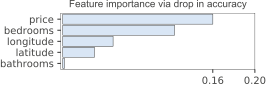

In [3]:
I = importances(rf, X_test, y_test)
plot_importances(I)

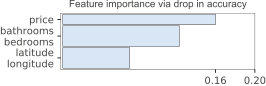

In [4]:
I = importances(rf, X_test, y_test, features=['price',['latitude','longitude']])
plot_importances(I)

## Breast cancer data set, classify malignant/benign

In [5]:
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
# show first 5 columns only
# df = pd.DataFrame(X[:, 0:10], columns=cancer.feature_names[0:10])
df = pd.DataFrame(X, columns=cancer.feature_names)
#df['diagnosis'] = cancer.target
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

cl = RandomForestClassifier(n_estimators=100)
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

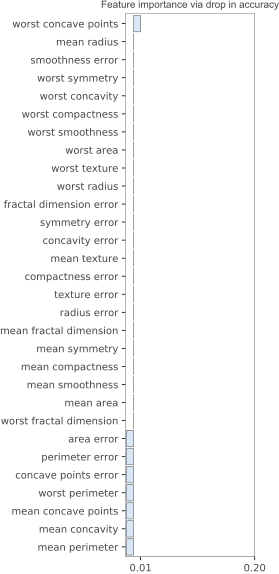

In [6]:
I = importances(cl, X_test, y_test)
plot_importances(I)

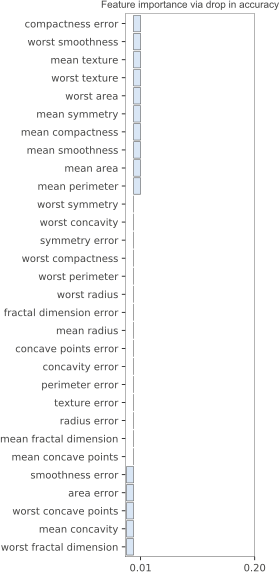

In [7]:
I = dropcol_importances(cl, X_train, y_train, X_test, y_test)
plot_importances(I)

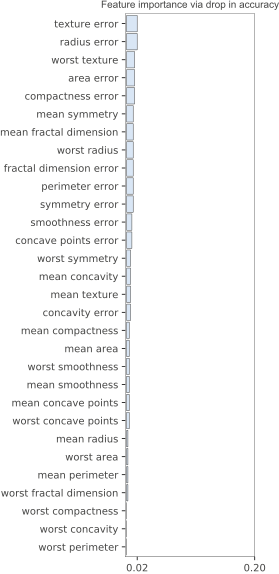

In [8]:
I = oob_dropcol_importances(cl, X_train, y_train)
viz = plot_importances(I)
viz

This obviously means that the features are highly collinear. Verified via:

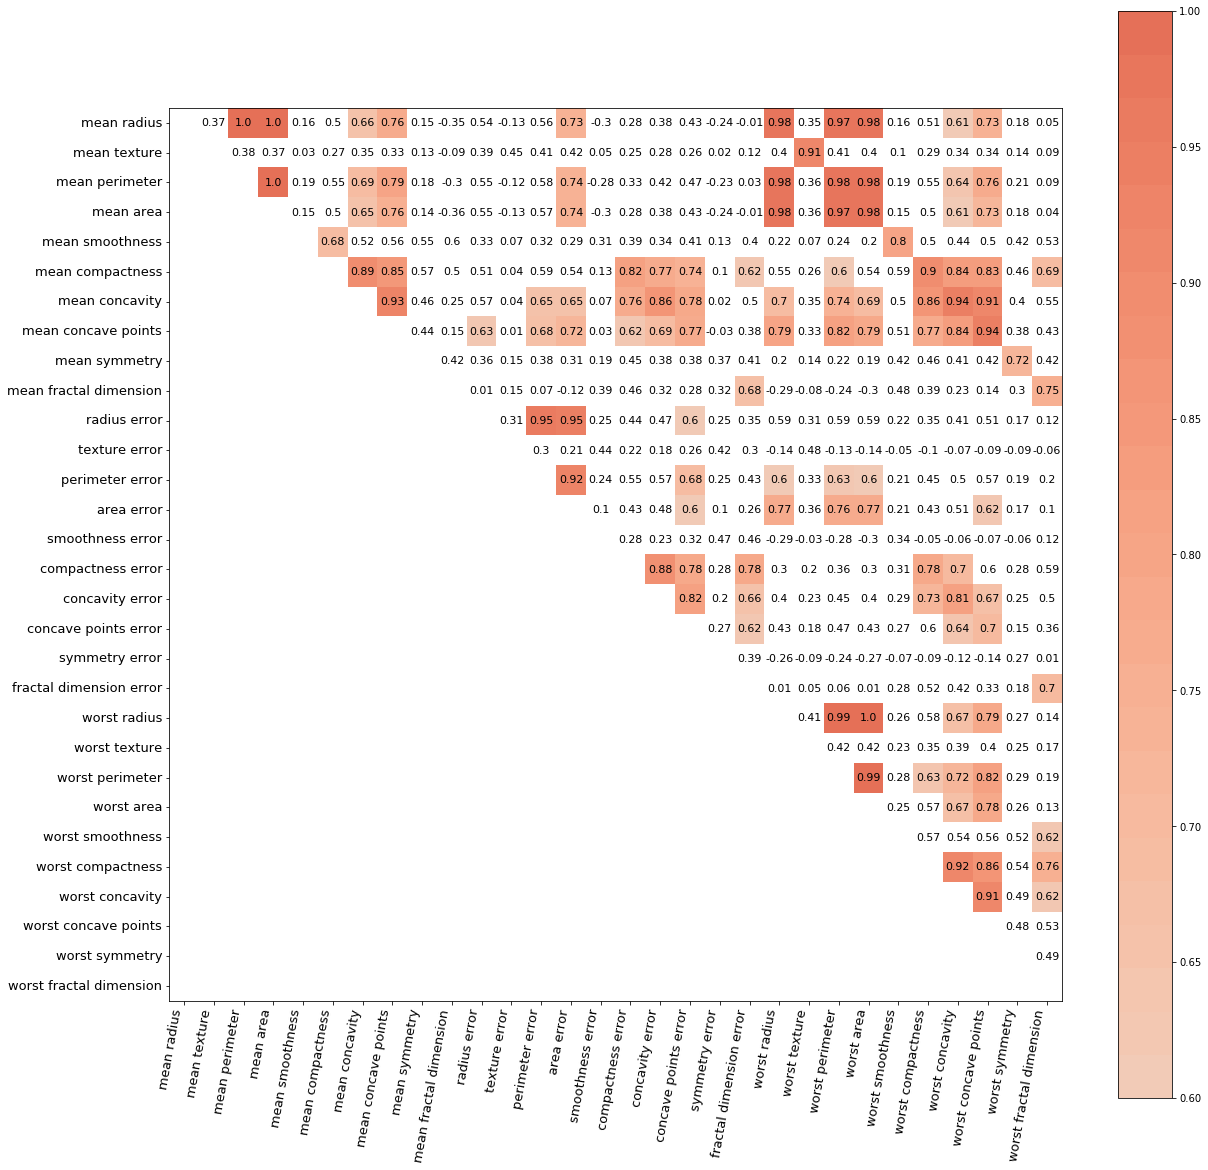

In [9]:
plot_corr_heatmap(X_train, figsize=(20,20), label_fontsize=13, value_fontsize=11)

Wow. And look at the predictability (R^2 or accuracy depending on column type) of the variables using other variables:

In [11]:
pd.set_option('precision', 2)
feature_dependence_matrix(X_train, n_samples=5000)

,Dependence,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1,1,-9e-06,0.13,1.2,-1.7e-05,2.8e-05,-3.7e-05,-2.4e-05,2.1e-05,...,3.3e-05,5.5e-05,0.00038,-5.9e-05,1.5e-05,0.00023,4.8e-05,-6.6e-05,-3.2e-06,-0.0002
worst radius,0.99,7.8e-05,-0.00013,-7.1e-05,1e-05,-7.2e-05,9.3e-05,-6.6e-05,4.4e-06,-1.3e-05,...,1,-4.3e-05,0.0076,1.8,3.2e-05,5e-05,6.6e-05,1.5e-05,2.3e-05,-3.8e-05
mean perimeter,0.99,0.84,-1.7e-05,1,0.24,9.4e-05,0.00044,0.00025,0.00024,-4.5e-05,...,6.3e-05,-9.6e-06,0.00043,0.00017,4.8e-05,0.00035,0.00026,0.00011,-0.00011,3.9e-05
mean area,0.99,1.7,9.8e-06,0.016,1,-6.9e-05,-0.00027,3.9e-06,-0.00046,-4.5e-06,...,0.001,-2.6e-05,0.00015,0.00023,5.9e-06,0.00015,-7.8e-05,-9.4e-05,-0.00011,-9.2e-05
worst area,0.98,-0.00095,0.0002,-2.7e-05,0.0007,2e-05,5.7e-06,0.00018,-0.00015,0.00014,...,1.8,-2.5e-05,0.02,1,-9.7e-05,-1.4e-05,-0.00028,-0.0001,0.00025,4.4e-05
worst perimeter,0.98,0.00062,-6.7e-05,0.0014,0.00023,-6.5e-05,0.0012,0.00055,0.00014,8.4e-05,...,1.2,-0.00054,1,0.12,-0.00016,0.0009,0.00058,0.00069,0.00012,-1.9e-05
mean concave points,0.94,0.00042,-0.00087,0.049,0.00052,0.013,0.0014,0.34,1,0.0012,...,0.0026,3.2e-05,0.0074,0.00057,0.0003,-0.00065,0.0019,0.35,-8.2e-05,0.0013
mean concavity,0.94,0.00065,-0.00033,0.00027,0.00036,0.0014,0.019,1,0.47,0.0019,...,0.00018,-0.00048,0.0005,-0.00058,0.00077,0.0015,0.22,0.015,-0.00074,-0.00011
worst concave points,0.93,-1.6e-05,-0.0002,-0.00043,0.0003,0.00017,0.00078,0.0053,0.94,0.0004,...,0.0011,0.0018,0.0014,0.00036,0.0018,0.018,0.096,1,0.0023,0.0006
mean compactness,0.91,-0.00022,0.00058,0.00061,0.00098,0.036,1,0.37,0.0087,0.026,...,0.00046,0.00074,0.0016,0.0013,-0.0022,0.24,0.0013,0.0006,-0.00053,0.00037
